## Question 4: -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

**Note** - Write comments wherever necessary explaining the code written.

**Link** - https://data.nasa.gov/resource/y77d-th95.json

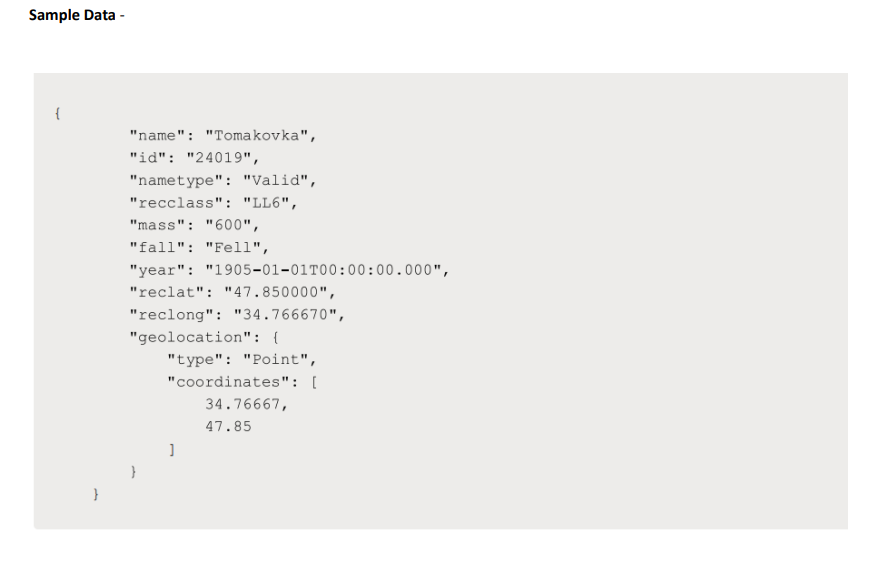

Excepted Output Data Attributes
* Name of Earth Meteorite - string id - ID of Earth
* Meteorite - int nametype - string recclass - string
* mass - Mass of Earth Meteorite - float year - Year at which Earth
* Meteorite was hit - datetime format reclat - float recclong - float
* point coordinates - list of int

In [5]:
import requests
import csv
import pandas as pd



In [2]:
# Function to download data from the given URL
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Function to convert data to proper structure
def convert_to_structured_data(data):
    structured_data = []
    for meteorite in data:
        mass = meteorite.get('mass')
        mass_float = float(mass) if mass is not None else None
        structured_data.append({
            'Name of Earth Meteorite': meteorite.get('name'),
            'id': meteorite.get('id'),
            'nametype': meteorite.get('nametype'),
            'recclass': meteorite.get('recclass'),
            'mass': mass_float,
            'year': meteorite.get('year', '')[:10],  # Extracting only the date part
            'reclat': float(meteorite.get('reclat', 0.0)),  # Use default value of 0.0 if 'reclat' key is missing
            'reclong': float(meteorite.get('reclong', 0.0)),  # Use default value of 0.0 if 'reclong' key is missing
            'point coordinates': [float(meteorite.get('reclat', 0.0)), float(meteorite.get('reclong', 0.0))]  # Use default value of 0.0 if 'reclat' or 'reclong' key is missing
        })
    return structured_data

# Function to save structured data as CSV
def save_to_csv(data, output_file):
    fieldnames = data[0].keys()
    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)




In [3]:
# Main program
def main():
    url = "https://data.nasa.gov/resource/y77d-th95.json"
    output_file = "meteorite_data.csv"

    # Download data from the URL
    json_data = download_data(url)

    if json_data:
        # Convert data to structured format
        structured_data = convert_to_structured_data(json_data)

        # Save structured data as CSV
        save_to_csv(structured_data, output_file)
        print("Data saved to", output_file)
    else:
        print("Failed to download data.")

# Run the program
if __name__ == "__main__":
    main()

Data saved to meteorite_data.csv


In [6]:
df=pd.read_csv('meteorite_data.csv')
df.head()

,Name of Earth Meteorite,id,nametype,recclass,mass,year,reclat,reclong,point coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[50.775, 6.08333]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[56.18333, 10.23333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[54.21667, -113.0]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[16.88333, -99.9]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-33.16667, -64.95]"
